In [16]:
#we import the methods we may need
import numpy as np
from scipy.optimize import minimize_scalar
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [17]:
#initialozation of the functions we are goind to study as well as hand calculated derivatives
def f(x) : 
    return x**4 - 16*x**3 - 45*x**2 - 20*x + 203        

def g(x) : 
    return -x**5 + 2*x**4 - 23*x**3 - 12*x**2 - 36*x   

def f_derivative(x):
    return 4*x**3 - 48*x**2 - 90*x - 20

def g_derivative(x):
    return -5*x**4 + 8*x**3 - 69*x**2 - 24*x - 36


In [18]:
# Line Search Algorithm
def line_search(func, derivative, xl, xu, tol=1e-6):
     # Initial guess for the minimum
    x_min = (xl + xu) / 2
    # Calculate derivatives at lower and upper bounds
    dl = derivative(xl)
    du = derivative(xu)
    # Continue until the interval is smaller than tolerance
    while abs(xu - xl) > tol:
        # If the current minimum differs from the minimum found by minimize_scalar,
        # plot the graph to visualize the progress
        # this is to avoid plotting too many graphs that will be almost identical to each other
        if round(x_min,2) != round(minimize_scalar(func, bounds=(xl,xu), method='bounded').x,2):
            plot_graph2(f, xl, xu, x_min)
        # Check the sign of the derivative at the current minimum
        if dl * derivative(x_min) < 0:
             # If the sign changes, update the upper bound
            xu = x_min
        else:
            # Otherwise, update the lower bound
            xl = x_min
        # Calculate the new minimum
        x_min = (xl + xu) / 2
    # Return the approximate location of the minimum
    return x_min


In [19]:
#plotting for the golden search method
def plot_graph(func, xl, xu, x1, x2):
    
    
    x = np.linspace(xl - 1, xu + 1, 400)
    y = func(x)
    
    # Plot base function
    plt.plot(x, y)
    plt.plot([xl, xu], [0, 0], 'k')
    
    # Plot x1 point
    plt.plot(x1, func(x1), 'ro', label='x1')
    plt.plot([x1, x1], [0, func(x1)], 'k')
    
    # Plot x2 point
    plt.plot(x2, func(x2), 'bo', label='x2')
    plt.plot([x2, x2], [0, func(x2)], 'k')
    
    # Plot x1 line
    plt.plot([x1, x1], [0, func(x1)], 'k')
    plt.annotate('x1', xy=(x1 - 0.1, -200))
    
    # Plot x2 line
    plt.plot([x2, x2], [0, func(x2)], 'k')
    plt.annotate('x2', xy=(x2 - 0.1, -200))
    
    # Set x-axis limit
    plt.xlim([xl - 1, xu + 1])
    
    # Set y-axis limit
    ymin = min(y) - 200
    ymax = max(y) + 200
    plt.ylim([ymin, ymax])
    
    # Calculate positions for annotations
    yrange = ymax - ymin
    offset = yrange * 0.05  # 5% of y-range
    y1_pos = ymax - offset
    y2_pos = ymax - 2 * offset
    
    # Annotate x1 and x2 values
    plt.text(xl, y1_pos, f'x1 = {x1:.2f}', fontsize=10)
    plt.text(xl, y2_pos, f'x2 = {x2:.2f}', fontsize=10)
    
    plt.show()

In [20]:
#plotting for the line search method
def plot_graph2(func, xl, xu, x_min):
    
    
    x = np.linspace(xl - 1, xu + 1, 400)
    y = func(x)
    
    # Plot base function
    plt.plot(x, y)
    plt.plot([xl, xu], [0, 0], 'k')
    
    # Plot x1 point
    plt.plot(x_min, func(x_min), 'ro', label='x1')
    plt.plot([x_min, x_min], [0, func(x_min)], 'k')
    
    # Plot x1 line
    plt.plot([x_min, x_min], [0, func(x_min)], 'k')
    plt.annotate('x_min', xy=(x_min - 0.1, -200))
    
    # Set x-axis limit
    plt.xlim([xl - 1, xu + 1])
    
    # Set y-axis limit
    ymin = min(y) - 200
    ymax = max(y) + 200
    plt.ylim([ymin, ymax])
    
    # Calculate positions for annotations
    yrange = ymax - ymin
    offset = yrange * 0.05  # 5% of y-range
    y1_pos = ymax - offset
    y2_pos = ymax - 2 * offset
    
    # Annotate x1 and x2 values
    plt.text(xl, y1_pos, f'x1 = {x_min:.2f}', fontsize=10)

    
    plt.show()

Optimization for function f(x):

Line Search:


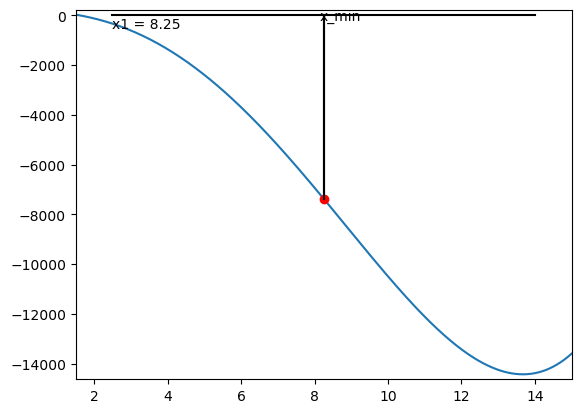

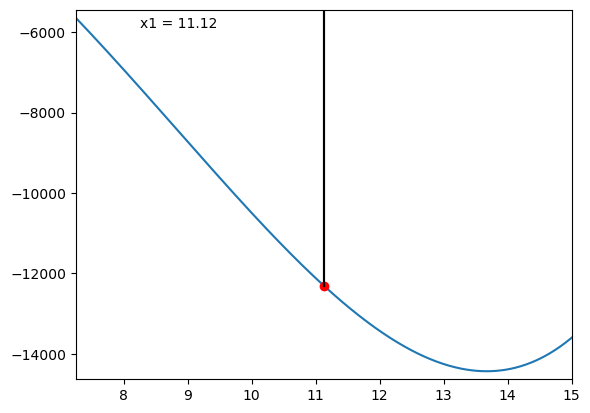

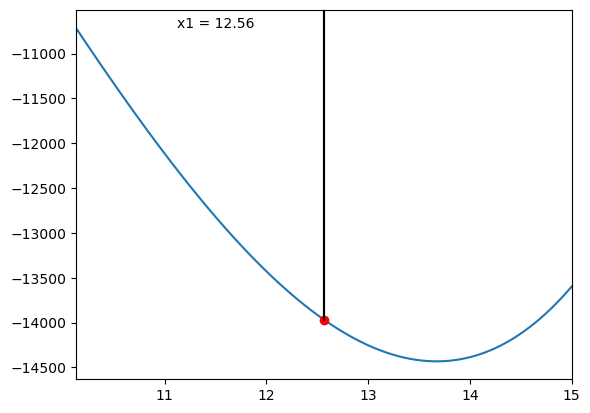

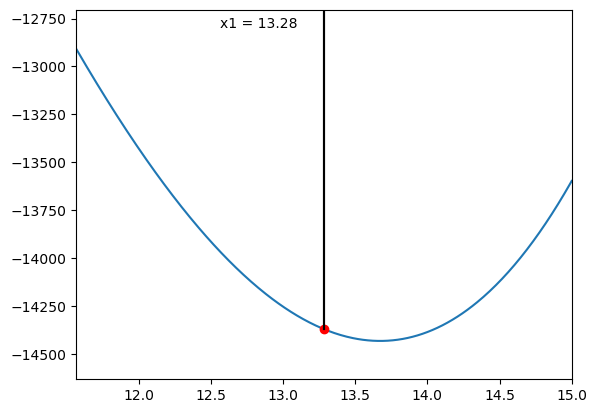

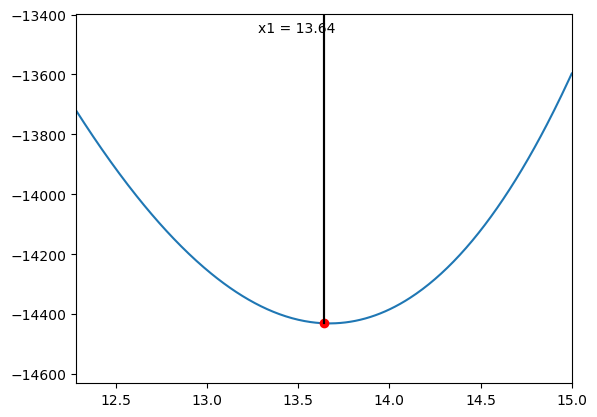

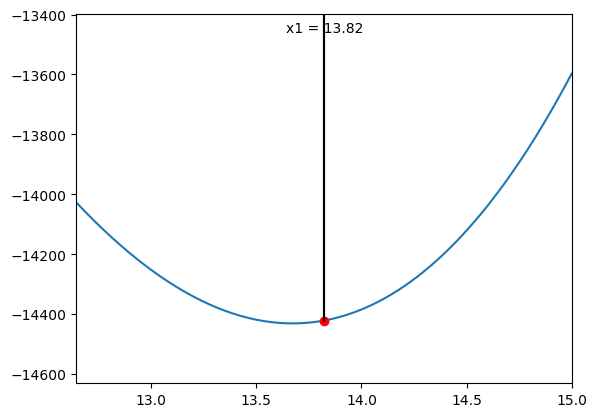

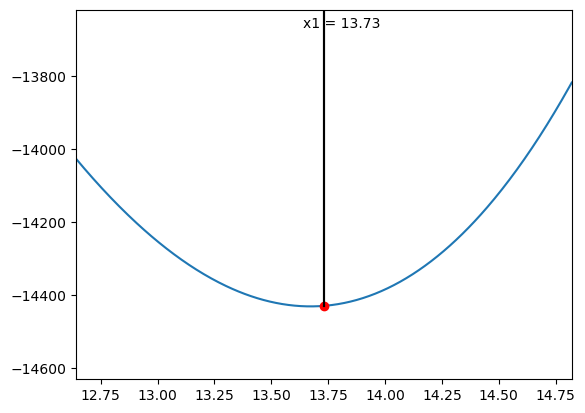

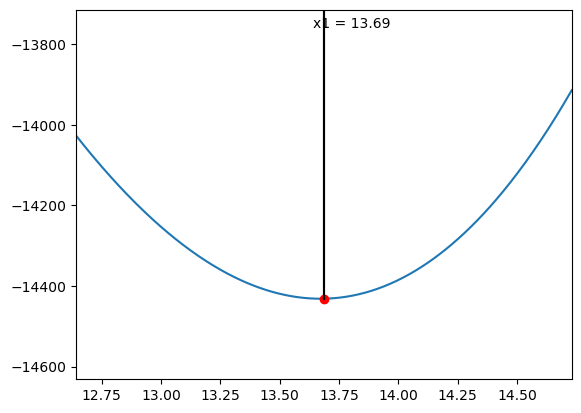

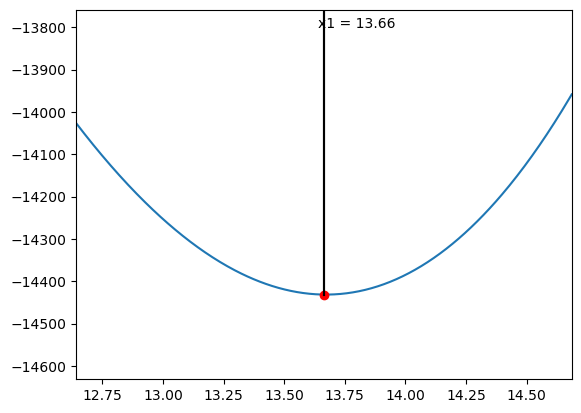

Optimal solution (Line Search): 13.67239885032177

Comparing with scipy's optimization methods:
Optimal solution (Scipy - function f): 13.672398202257863

Optimization for function g(x):

Line Search:


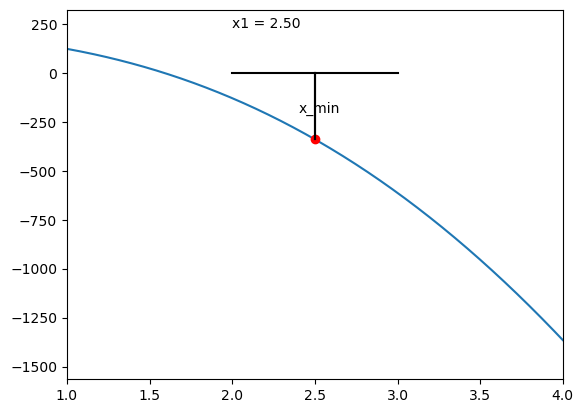

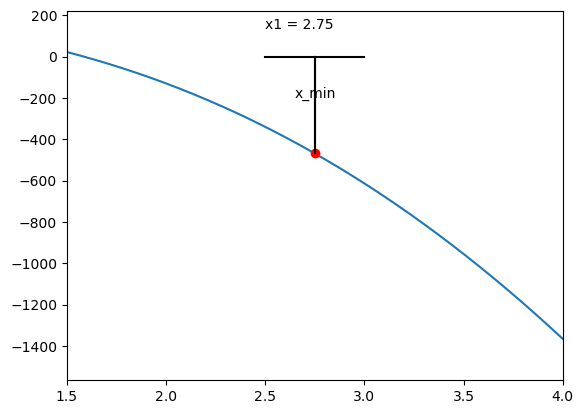

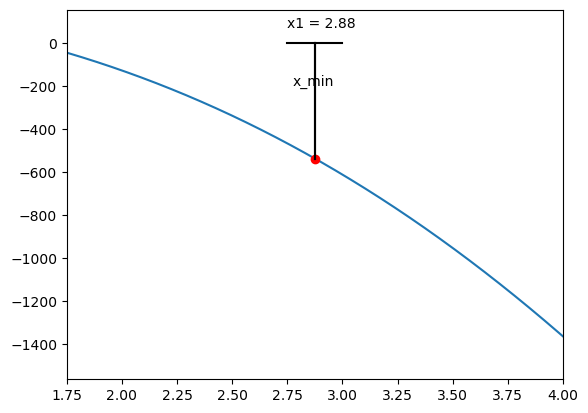

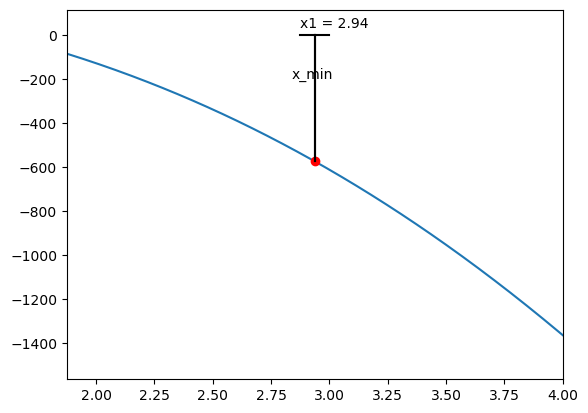

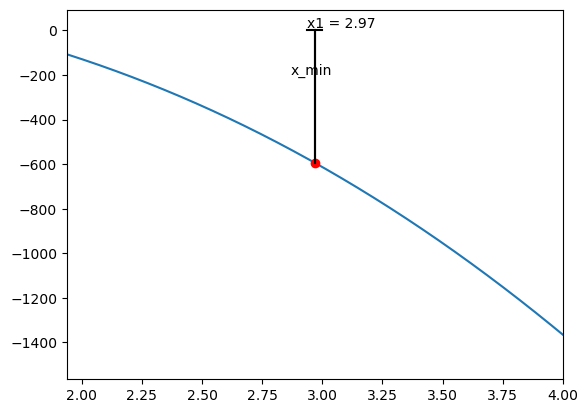

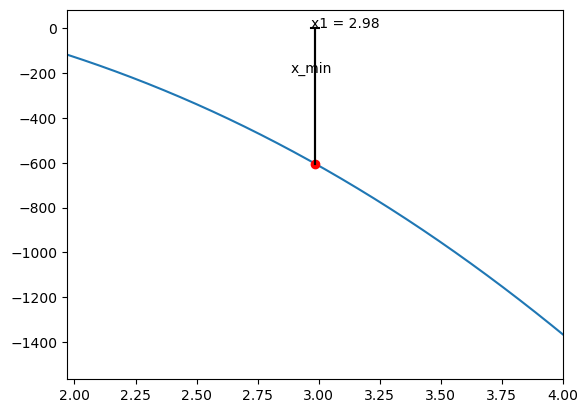

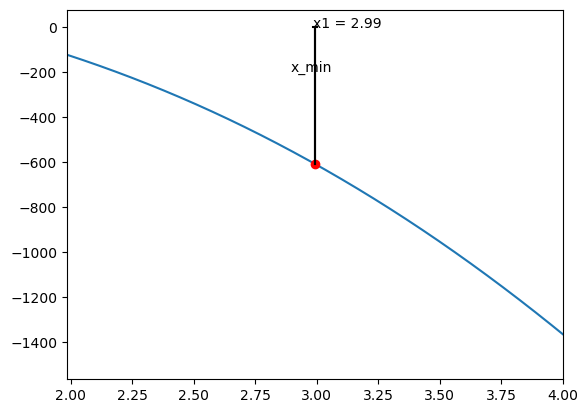

Optimal solution (Line Search): 2.999999523162842

Comparing with scipy's optimization methods:
Optimal solution (Scipy - function f): 2.999994039139014


In [21]:
#output description

range_f = (2.5, 14)
range_g = (2, 3)
 
print("Optimization for function f(x):")

print("\nLine Search:")
result_f_line = line_search(f, f_derivative, *range_f)
print("Optimal solution (Line Search):", result_f_line)

print("\nComparing with scipy's optimization methods:")
result_f_scipy = minimize_scalar(f, bounds=range_f, method='bounded')
print("Optimal solution (Scipy - function f):", result_f_scipy.x)

print("\nOptimization for function g(x):")

print("\nLine Search:")
result_g_line = line_search(g, g_derivative, *range_g)
print("Optimal solution (Line Search):", result_g_line)

print("\nComparing with scipy's optimization methods:")
result_g_scipy = minimize_scalar(g, bounds=range_g, method='bounded')
print("Optimal solution (Scipy - function f):", result_g_scipy.x)

Optimization for function f(x):

Golden Section Search:


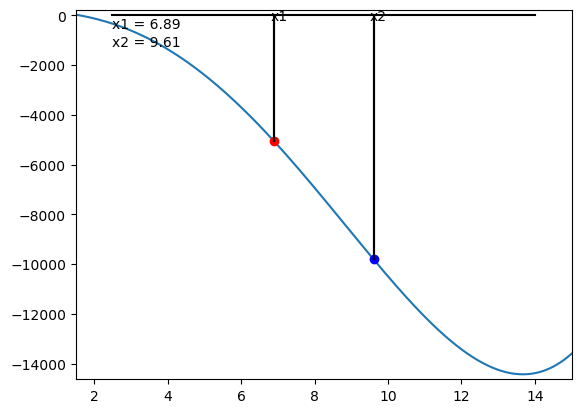

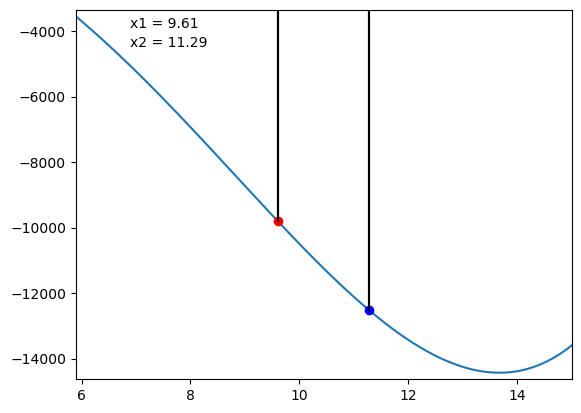

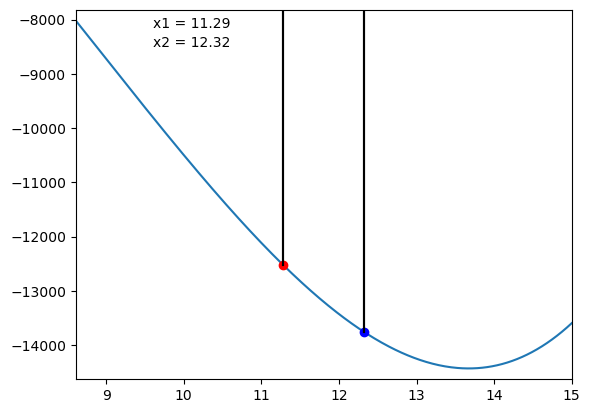

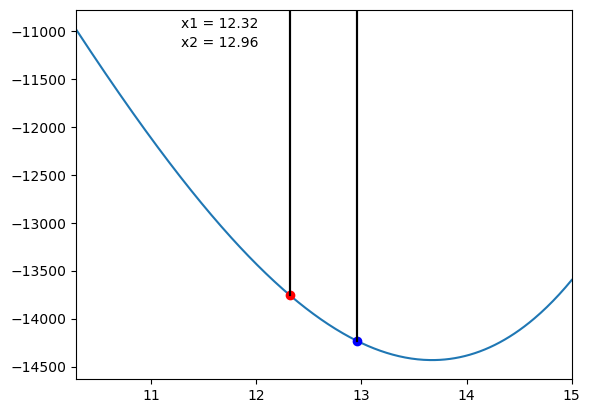

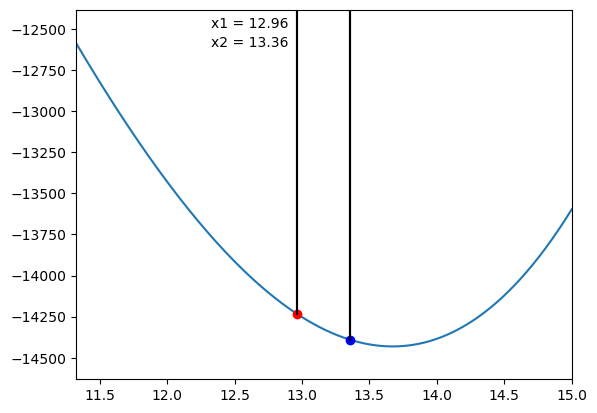

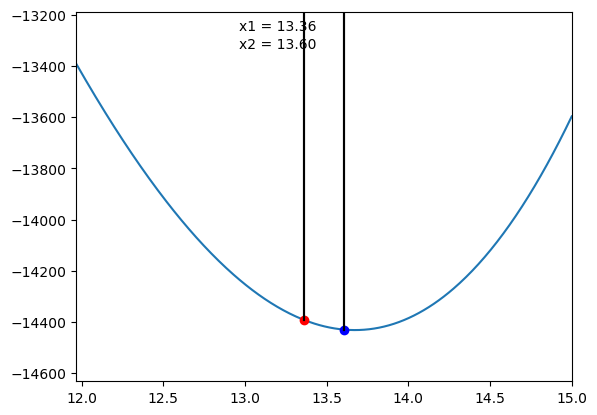

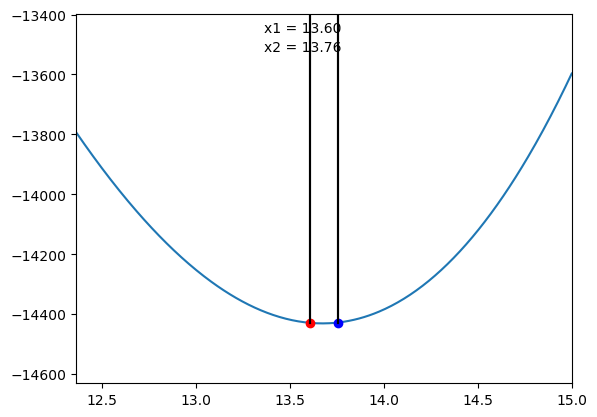

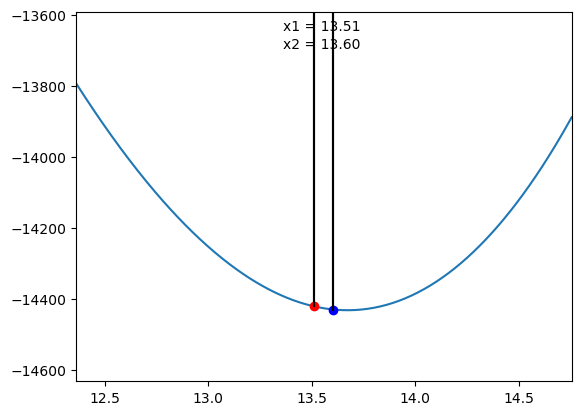

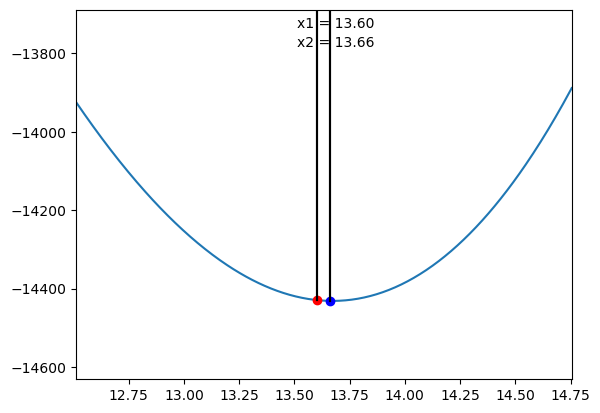

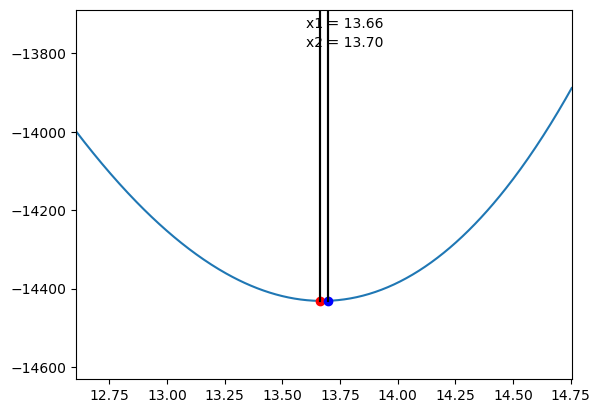

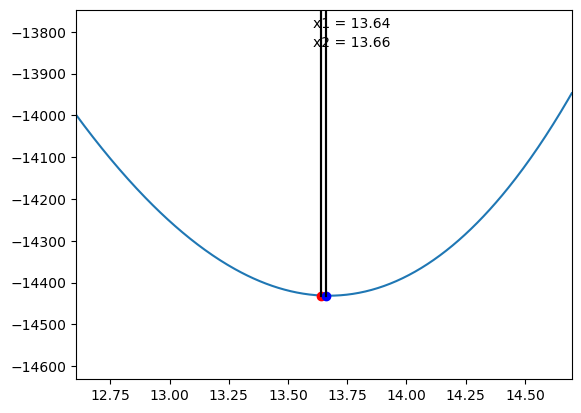

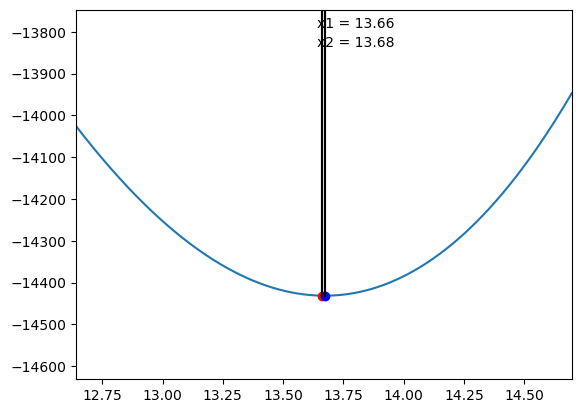

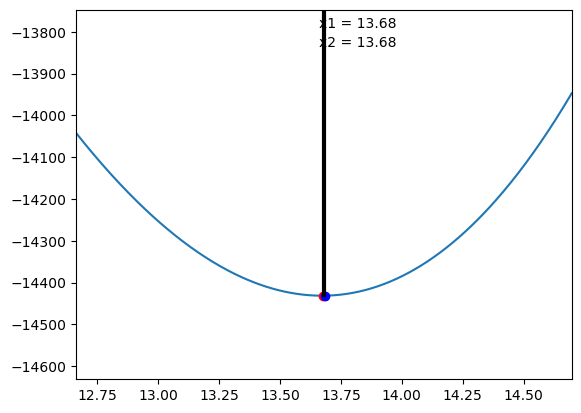

Optimal solution (Golden Section Search): 13.67239854418677

Comparing with scipy's optimization methods:
Optimal solution (Scipy - function f): 13.672398202257863

Optimization for function g(x):

Golden Section Search:


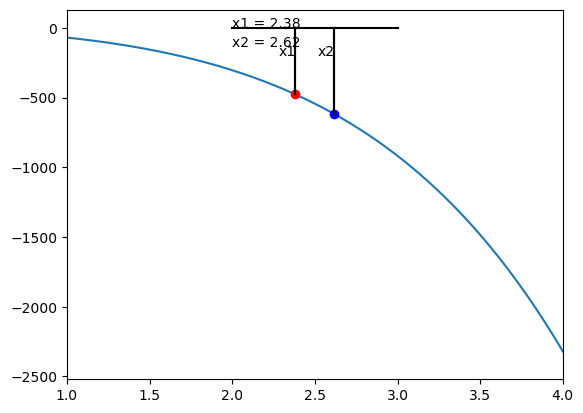

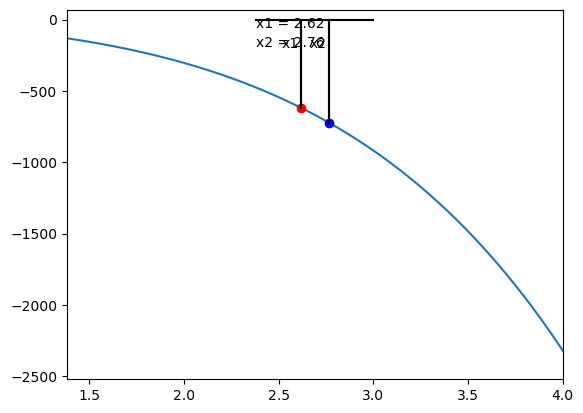

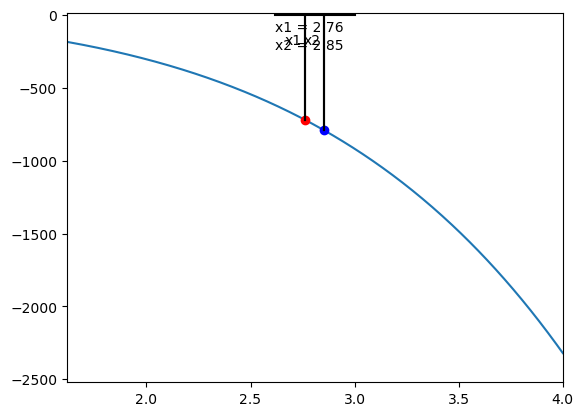

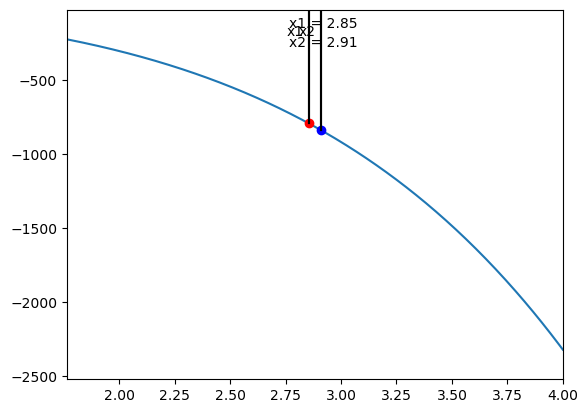

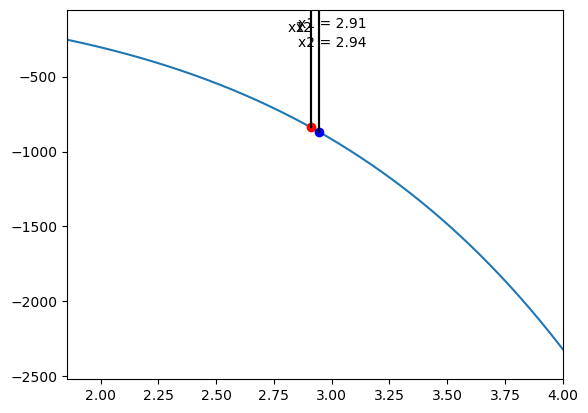

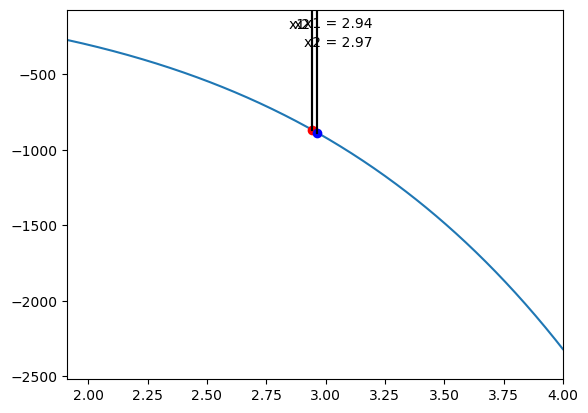

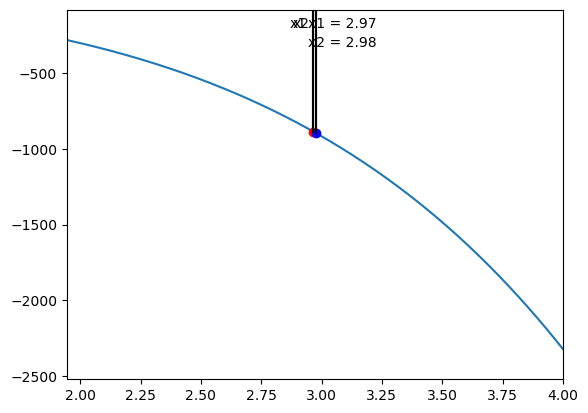

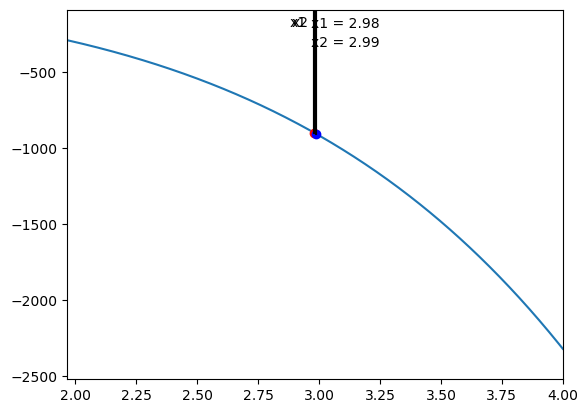

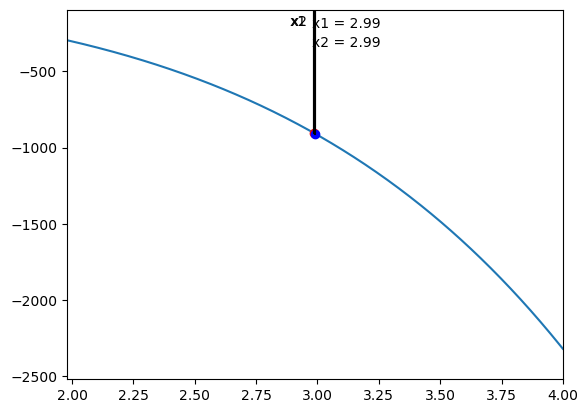

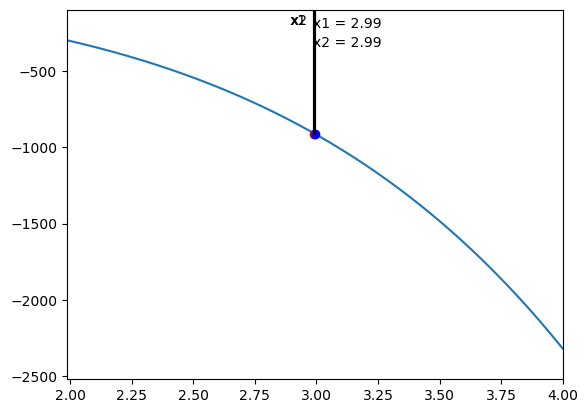

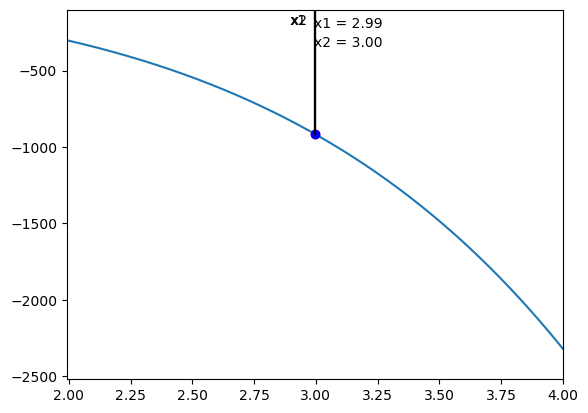

Optimal solution (Golden Section Search): 2.9999999999996216

Comparing with scipy's optimization methods:
Optimal solution (Scipy - function f): 2.999994039139014


In [22]:
print("Optimization for function f(x):")

print("\nGolden Section Search:")
result_f_golden = golden_section_search(f, *range_f)
print("Optimal solution (Golden Section Search):", result_f_golden)

print("\nComparing with scipy's optimization methods:")
result_f_scipy = minimize_scalar(f, bounds=range_f, method='bounded')
print("Optimal solution (Scipy - function f):", result_f_scipy.x)

print("\nOptimization for function g(x):")

print("\nGolden Section Search:")
result_g_golden = golden_section_search(g, *range_g)
print("Optimal solution (Golden Section Search):", result_g_golden)

print("\nComparing with scipy's optimization methods:")
result_g_scipy = minimize_scalar(g, bounds=range_g, method='bounded')
print("Optimal solution (Scipy - function f):", result_g_scipy.x)